# Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. i will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

The dataset that i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.)



## The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API.

### Image Predictions File

One more cool thing: Udacity ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs.
The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


# Gather

In [1065]:
#importing the necessary libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import requests
import json
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option("display.max_rows", None, "display.max_columns", None)



### twitter archive enhanced file

I Downloaded this file manually from Udacity ressources .

In [1066]:
#reading the twitter archive enhanced file
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### additional data via the API

for the additional data via the API , i choosed to read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."

In [1067]:
twitter_data = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        twitter_data.append({'tweet_id': json_data['id'],'favorites': json_data['favorite_count'],'retweets': json_data['retweet_count']})
twitter_data = pd.DataFrame(twitter_data, columns=['tweet_id','favorites','retweets'])

In [1068]:
twitter_data.head(6)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261


### image predictions file 

In [1069]:
# downloading the image predictions file from the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
#reading the file into a DataFrame
image_predictions  = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assess

### Visual Assessement 

in Visual assessement , we try to look at our data and identify the tidiness and quality issues we can spot at first glance !

In [1070]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1071]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [1072]:
twitter_data.sample(20)

,tweet_id,favorites,retweets
624,795400264262053889,11270,3323
1098,735648611367784448,4397,1237
2301,666996132027977728,258,102
2148,669683899023405056,412,119
1800,676949632774234114,1413,448
592,798925684722855936,8246,1663
2014,672169685991993344,1074,408
1483,693155686491000832,8668,3622
120,869596645499047938,16476,3327
172,858471635011153920,22640,5271


In [1073]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1074]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


having looked at the datasets seperately , I could already identify some quality issues , like non dog names such as "a" and "and" , as well as non dog breed names such as banana .. checking the tail of the datasets always provides me with insights on data quality .

### Programmatic Assessement

In [1075]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1076]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [1077]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1078]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1079]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1080]:
#checking for nulls in expanded urls
archive[archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [1081]:
#checking for duplicates in tweet_id
twitter_data.tweet_id.duplicated().any()
image_predictions.tweet_id.duplicated().any()
archive.tweet_id.duplicated().any()

False

In [1082]:
#checking for retweets
archive[archive.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [1083]:
#checking for replies
archive[archive.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [1084]:
#checking dog names
archive.name.value_counts().head(20)


None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
an           7
Toby         7
Daisy        7
Bailey       7
Bella        6
Jax          6
Name: name, dtype: int64

### Documentation :

#### Quality issues :
* there are 181 retweets and 78 replies that shall be removed.
* the json dataset has 2354 rows compared to 2356 in the archive dataset , so there is missing data in the 'json additional data' via the api.
* timestamp , retweeted_status_timestamp are of type object (string) instead of datetime.
* tweet_id is of type integer but it should be a string.
* there are 23 rows with the denominator being different to 10 , and numenator less than 10 , which can be problematic given WeRateDogs funny rating system .
* there are 59 missing expanded urls ( row 30 for instance ).
* certain dog names are invalid , having "a" , "an" , etc in names as well as None strings instead of Nan .
* missing data in image predictions (2075 records) .
* problem of random capitalization in p1 , p2 and p3 as well as the occurrence of underscores instead of spaces.
* there are some False values in p1_dog , p1 is the most confident prediction so Falses would indicate that there are no corresponding dog breeds , those entries will be removed.
* source column is in HTML format.
* some dog breeds aren't actual dog breeds .
* in all 3 datasets , there are unuseful columns that will be deleted .



#### tidiness issues :
* separate dataframes that we need to merge into one.
* combine doggo , floofer , pupper , puppo into one stage column .

note : for the quality issues , not all of them are going to be cleaned for this analysis.

# Clean

In [1085]:
#creating copies of the three dataframes
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

## Missing data

### define
- we're gonna fill in the missing urls by the url format in other tweets and by adding the tweet id .

### code

In [1086]:

def  fill_urls(row):
#If expanded_urls is null, add tweet id
 if pd.isnull(row['expanded_urls']):
    twitter_id = row['tweet_id']
#Make new URL and save into expanded_urls
    row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(twitter_id)
#return updated row
 return row
#apply the changes to the dataframe
archive_clean = archive_clean.apply(fill_urls, axis=1) 

### test

In [1087]:
archive_clean[archive_clean.expanded_urls.isnull()].shape[0]


0

## Tidiness Issues

### define

merging all three dataframes together.

### code 

In [1088]:
#merging twitter data and archive dataframes together  
archive_clean = pd.merge(archive_clean,twitter_data_clean,how = 'inner', on = ['tweet_id'])
#joining image predictions dataframe
df = pd.merge(archive_clean, image_predictions_clean, how = 'inner', on = ['tweet_id'])

### test

In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Define
- combine doggo , floofer , pupper , puppo into one stage column .

### code 

In [1090]:
#extracting dog stage from each row into a new column "dog_stages"
df['dog_stages'] = df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
#dropping 'doggo','floofer','pupper','puppo' columns
df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

### test 

In [1091]:
df.dog_stages.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stages, dtype: int64

In [1092]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  favorites                   2073 

### Quality issues 

### define
- deleting retweets and replies.

### code 

In [1093]:
#deleting retweets
df = df[pd.isnull(df.retweeted_status_id)]
#deleting replies
df= df[pd.isnull(df.in_reply_to_status_id)]

### test

In [1094]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  favorites                   1971 

### define 
- tweet-id should be of type object instead of integer.

### code

In [1095]:
#changing tweet id type from integer to object
df["tweet_id"]= df["tweet_id"].astype(str) 

### test 

In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  favorites                   1971 

### define 

- there are some False values in p1_dog , p1 is the most confident prediction so Falses would indicate that there are no corresponding dog breeds , those entries will be removed.

### code

In [1097]:
#dropping False values from p1
df.drop(df[df['p1_dog'] == False].index, inplace=True)

### test 

In [1098]:
df[df['p1_dog']==False].shape[0]

0

### define 

conversion of timestamp and retweeted_status_timestamp to datetime .

### code

In [1099]:
#conversion of timestamp and retweeted_status_timestamp to datetime
df.timestamp=pd.to_datetime(df.timestamp)
df.retweeted_status_timestamp=pd.to_datetime(df.retweeted_status_timestamp)

### test 

In [1100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1463 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1463 non-null   datetime64[ns, UTC]
 4   source                      1463 non-null   object             
 5   text                        1463 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               1463 non-null   object             
 10  rating_numerator            1463 non-null   int64           

### define 

fixing denominator problems , we're going to remove all rows with denominator different to 10.

### code

In [1101]:
#dropping rows with denominators different to 10
df.drop(df[df['rating_denominator'] != 10].index, inplace=True)

### test 

In [1102]:
df.rating_denominator.value_counts()

10    1449
Name: rating_denominator, dtype: int64

### define 

how can we give our lovely dogs poor ratings ? let's remove the entries where the numerator is less than 10 ! after all that's the WeRateDogs rating system !

### code

In [1103]:
#dropping rows with numerators less than 10
df.drop(df[df['rating_numerator'] < 10].index, inplace=True)

### test 

In [1104]:
df.rating_numerator.value_counts()

12    378
10    318
11    305
13    208
14     19
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

much better !

### define 

having looked seperately at the texts with dog names such as "None" and "a" , I have noticed that the majority is indeed tweets without names ! like fun tweets of dogs and ratings ! so Im gonna drop those rows because im gonna work on the dogs names later , Also , i spotted some non dog names such as "quite" and "space" , given that all dog names are capitalized , im going to remove these rows .

### code

In [1105]:
#removing weird names that are not dog names
df.drop(df[df.name.str.islower()==True].index, inplace=True)
#removing names with None 
df.drop(df[df.name=="None"].index, inplace=True)

### test 

In [1106]:
#checking for Lowercase names
df.name.str.islower().any()

False

In [1107]:
df.name.value_counts()

Charlie           10
Cooper             9
Lucy               8
Oliver             8
Tucker             7
Koda               6
Sadie              6
Daisy              6
Penny              6
Stanley            5
Jax                5
Winston            5
Leo                5
Bo                 5
Cassie             4
Dave               4
Bear               4
Reggie             4
Lola               4
Scooter            4
Louis              4
Sophie             4
Chester            4
Rusty              4
Finn               4
Rosie              3
Gus                3
Zeke               3
Vincent            3
Max                3
Sammy              3
Scout              3
Dexter             3
Archie             3
Jeffrey            3
Ellie              3
Oscar              3
Sebastian          3
Bentley            3
George             3
Oakley             3
Wilson             3
Maggie             3
Jack               3
Bella              3
Boomer             3
Winnie             3
Toby         

### define 

* problem of random capitalization in p1 , p2 and p3 as well as the occurence of underscores instead of spaces.
Im going to put all dog breeds in lowercase , as well as remove underscores and replace them with spaces.


### code

In [1108]:
#replacing underscores with spaces
df['p1']=df['p1'].str.replace('_',' ')
#putting all dog breeds in lowercase (we're only applying on p1 since p2 and p3 are going to be removed next)
df['p1']=df['p1'].str.lower()

### test 

In [1109]:
df.p1.sample(10)

1572                         pug
695                     malamute
895                     malamute
1413                      vizsla
413                       beagle
919                   pomeranian
223     chesapeake bay retriever
1196           italian greyhound
1805        old english sheepdog
431             golden retriever
Name: p1, dtype: object

### define 

the source column still has HTML tags , Im going to replace the links with source names using replace.

### code

In [1110]:
df.replace(r'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', regex=True , inplace =True)
df.replace(r'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', regex=True , inplace =True)
df.replace(r'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweetdeck', regex=True , inplace =True)


### test 

In [1111]:
df.source.value_counts()

Twitter for iPhone    881
Twitter Web Client      8
Tweetdeck               6
Name: source, dtype: int64

### define 

- drop unneeded columns for analysis .

### code

In [1112]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','img_num','p1_conf','p1_dog','p2','p2_dog','p2_conf','p3','p3_conf','p3_dog'], axis=1, inplace=True)

### test

In [1113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 2042
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            895 non-null    object             
 1   timestamp           895 non-null    datetime64[ns, UTC]
 2   source              895 non-null    object             
 3   text                895 non-null    object             
 4   expanded_urls       895 non-null    object             
 5   rating_numerator    895 non-null    int64              
 6   rating_denominator  895 non-null    int64              
 7   name                895 non-null    object             
 8   favorites           895 non-null    int64              
 9   retweets            895 non-null    int64              
 10  jpg_url             895 non-null    object             
 11  p1                  895 non-null    object             
 12  dog_stages          121 non-null   

# Analysis 

to perform our analysis , we first need to save our cleaned and combined dataframe to csv under the name twitter_archive_master.csv .

In [1114]:
df.to_csv(r'Documents\twitter_archive_master.csv' , index = False)

In [1115]:
#reading the twitter archive master file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [1116]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,p1,dog_stages
771,675006312288268288,2015-12-10 17:37:00+00:00,Twitter for iPhone,Say hello to Mollie. This pic was taken after ...,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,1057,252,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,boxer,pupper
532,725842289046749185,2016-04-29 00:21:01+00:00,Twitter for iPhone,This is Colby. He's currently regretting all t...,https://twitter.com/dog_rates/status/725842289...,12,10,Colby,7691,2970,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,toy poodle,NaN
245,812709060537683968,2016-12-24 17:18:34+00:00,Twitter for iPhone,This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,7373,1665,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,irish setter,NaN
628,701889187134500865,2016-02-22 21:59:57+00:00,Twitter for iPhone,This is Bilbo. He's not emotionally prepared t...,https://twitter.com/dog_rates/status/701889187...,11,10,Bilbo,3905,1558,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,french bulldog,NaN
823,671186162933985280,2015-11-30 04:37:05+00:00,Twitter for iPhone,This is Sparky. That's his pancake now. He wil...,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,788,241,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,chihuahua,NaN
718,683481228088049664,2016-01-03 02:53:17+00:00,Twitter for iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,2878,1118,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,keeshond,pupper
444,754856583969079297,2016-07-18 01:53:28+00:00,Twitter for iPhone,This is Winnie. She's not a fan of the fast mo...,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,7616,2870,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,golden retriever,NaN
654,695409464418041856,2016-02-05 00:51:51+00:00,Twitter for iPhone,This is Bob. He just got back from his job int...,https://twitter.com/dog_rates/status/695409464...,10,10,Bob,9460,4017,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,pug,NaN
686,688064179421470721,2016-01-15 18:24:18+00:00,Twitter for iPhone,This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,1878,408,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,eskimo dog,NaN
175,829501995190984704,2017-02-09 01:27:41+00:00,Twitter for iPhone,This is Leo. He was a skater pup. She said see...,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,34913,12224,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,french bulldog,NaN


## Question 1 : what is the distribution of dogs per stage ? 

In [1117]:
dog_stage_dist=twitter_archive_master.dog_stages.value_counts()
dog_stage_dist

pupper     72
doggo      30
puppo      17
floofer     2
Name: dog_stages, dtype: int64

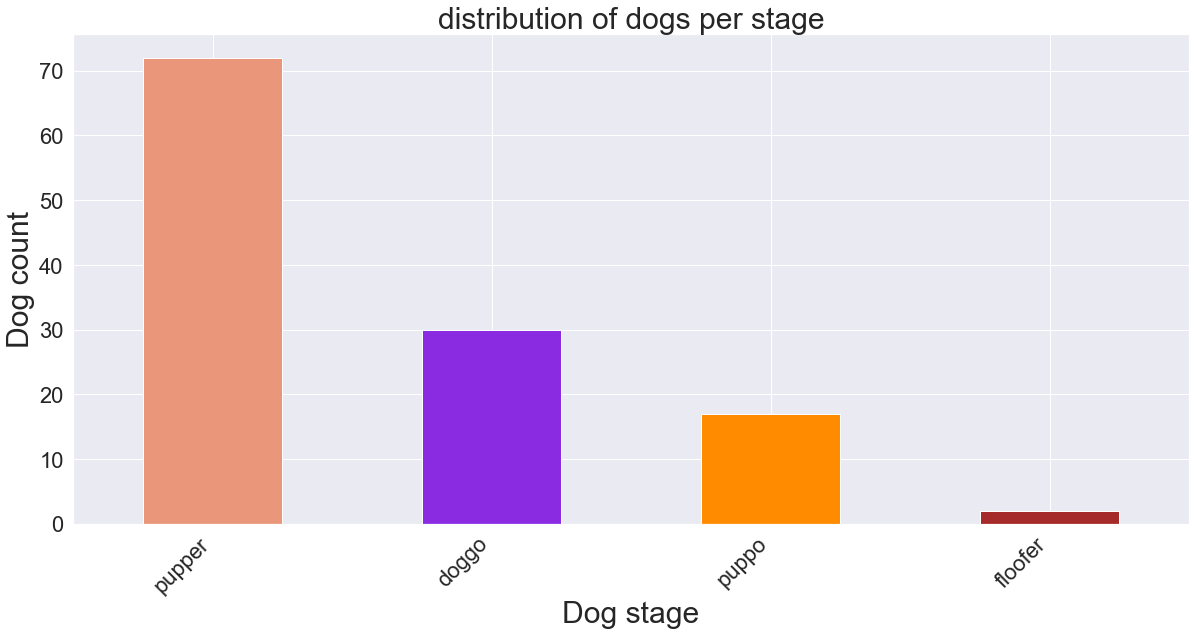

In [1118]:
#creating a list of colors to use in our plot
color_list=['DarkSalmon','blueviolet','DarkOrange' ,'brown' ]
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 9));
dog_stage_dist.plot(kind='bar' , color=color_list);
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the plot's labels and title
plt.title('distribution of dogs per stage', fontsize = 30)
plt.xlabel('Dog stage', fontsize = 30)
plt.ylabel('Dog count', fontsize = 30);

Puppers are the most common dogs in this dataset , while floofers are the least ! interesting !

## Question 2 : what are the top 5 dog breeds with the most favorites ?

In [1119]:
fav_dogs=df.groupby('p1')['favorites'].sum().sort_values(ascending=False).head(5)
fav_dogs

p1
golden retriever      1193996
pembroke               723837
labrador retriever     706936
chihuahua              524573
french bulldog         433549
Name: favorites, dtype: int64

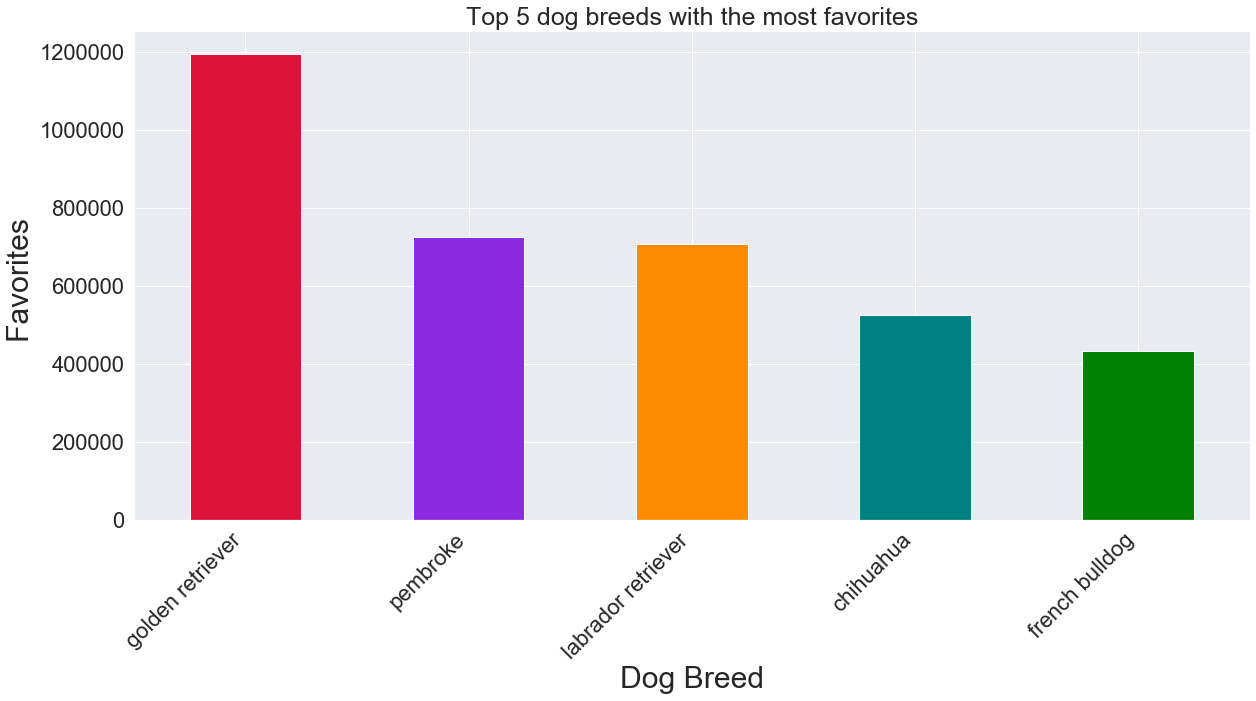

In [1120]:
#creating a list of colors to use in our plot
color_list=['crimson','blueviolet','DarkOrange' ,'teal' , 'green' ]
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 9));
fav_dogs.plot(kind='bar' , color=color_list);
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the plot's labels and title
plt.title('Top 5 dog breeds with the most favorites', fontsize = 25)
plt.xlabel('Dog Breed', fontsize = 30)
plt.ylabel('Favorites ', fontsize = 30);

it looks like golden retriever is the dog breed that got the most favorites !

## Question 3 : what are the 100 most common Dog names ?

for this question , Im gonna create a wordcloud that displays the top 100 most common names.

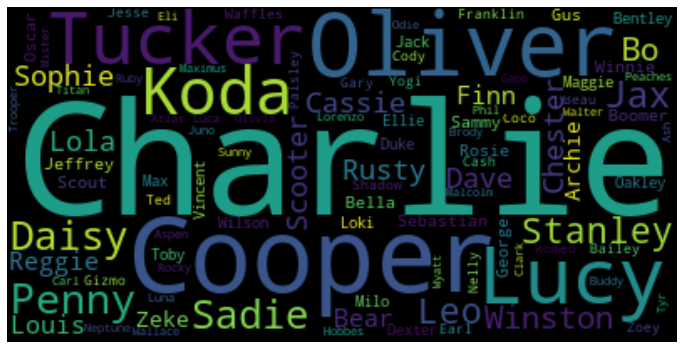

In [1125]:
text = " ".join(name for name in twitter_archive_master.name)

# Create and generate a word cloud image:
wordcloud = wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black" ).generate(text)

# Display the generated image:
plt.figure( figsize=(12,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Saving the image
wordcloud.to_file("Documents/100names.png")

it looks like Charlie , Cooper , Oliver and Tucker are the most common names !

## Question 4 : what is the distribution of source for this dataset ?

In [1122]:
source_dist=twitter_archive_master.source.value_counts()
source_dist

Twitter for iPhone    881
Twitter Web Client      8
Tweetdeck               6
Name: source, dtype: int64

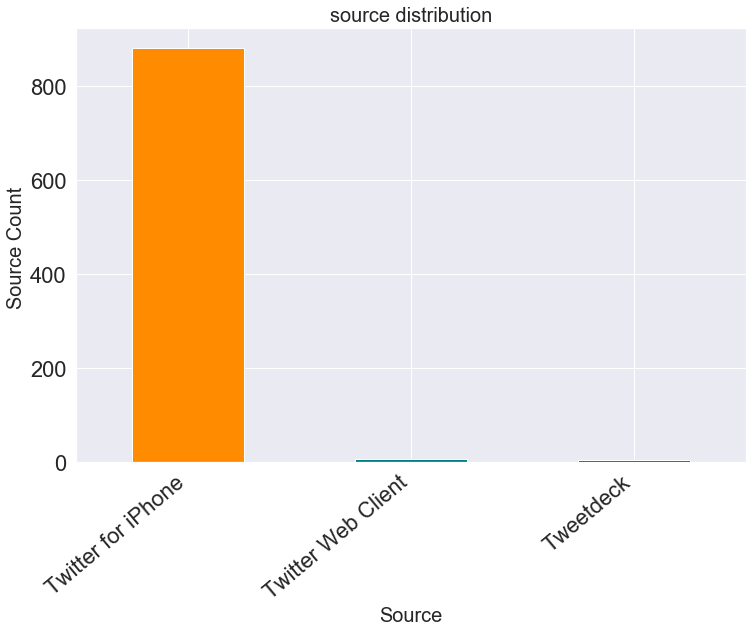

In [1127]:
#creating a list of colors to use in our plot
color_list=['DarkOrange' ,'teal' , 'green' ]
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(12, 8));
source_dist.plot(kind='bar' , color=color_list);
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=40, horizontalalignment='right')
#setting the plot's labels and title
plt.title('source distribution', fontsize = 20)
plt.xlabel('Source', fontsize = 20)
plt.ylabel('Source Count ', fontsize = 20);

Twitter for iPhone is the most used source by a huge difference to Twitter web client and Tweetdeck !